In [18]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from collections import defaultdict

# Settings
plt.figure(figsize=(12,6), facecolor='white')
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['figure.facecolor'] = 'white'

<Figure size 864x432 with 0 Axes>

In [19]:
# Get patient data
raw_data = []
for file in glob.glob('fhir/*'):
    raw_data.append(pd.read_json(file))

,Systolic,Diastolic
count,10.000000,10.000000
mean,118.700000,79.100000
std,12.275088,5.279941
min,101.000000,72.000000
25%,108.250000,75.500000
50%,118.000000,79.000000
75%,127.500000,81.000000
max,135.000000,89.000000


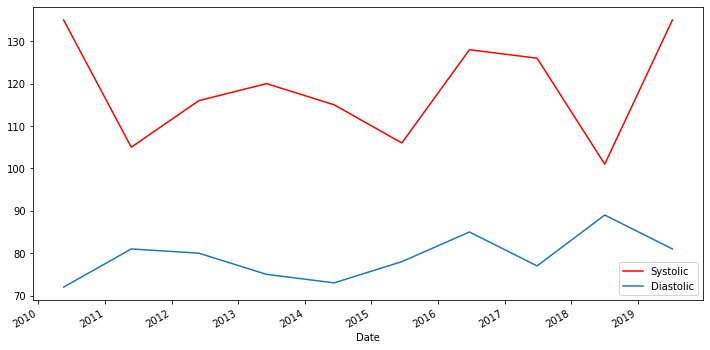

In [20]:
# Init
CONST_BLOOD_PRESSURE_CODE = '85354-9'
CONST_CREATINE_CODE = '38483-4'

effective_date = []
effective_date2 = []
diastolic_val = []
systolic_val = []
creatine_val = []

# Extract info from first patient
for i in range(raw_data[0]['entry'].count()):
    resource_type = raw_data[0]['entry'][i]['resource']['resourceType']
    if resource_type == "Observation":
        code = raw_data[0]['entry'][i]['resource']['code']['coding'][0]['code']
        if code == CONST_CREATINE_CODE:
            creatine_val.append(raw_data[0]['entry'][i]['resource']['valueQuantity']['value'])
            effective_date2.append(raw_data[0]['entry'][i]['resource']['effectiveDateTime'])
        if code == CONST_BLOOD_PRESSURE_CODE:
            diastolic_val.append(raw_data[0]['entry'][i]['resource']['component'][0]['valueQuantity']['value'])
            systolic_val.append(raw_data[0]['entry'][i]['resource']['component'][1]['valueQuantity']['value'])
            effective_date.append(raw_data[0]['entry'][i]['resource']['effectiveDateTime'])            

# Construct DataFrame
df = pd.DataFrame({'Date' : effective_date, 'Systolic' : systolic_val, 'Diastolic' : diastolic_val})
df['Date'] = pd.to_datetime(df['Date'])

# Display
df.plot(x='Date', y='Systolic', color='red', ax=plt.gca())
df.plot(x='Date', y='Diastolic', ax=plt.gca())
df.describe()


In [21]:
df2 = pd.DataFrame({'Date' : effective_date2, 'Creatine' : creatine_val})
df2['Date'] = pd.to_datetime(df2['Date'])
df2.describe()

,Creatine
count,3.000000
mean,2.145167
std,1.057566
min,0.930000
25%,1.789000
50%,2.648000
75%,2.752750
max,2.857500
